# **Teoria de Grafos – Atividade**

## *Pré-Processamento*
---

In [ ]:
pip install networkx matplotlib

## *Algorítmo Dijkstra*
---

Tempos mais curtos para alcançar cada curva a partir do 'Início':
Início: 0 segundos
Curva 1: 5 segundos
Curva 2: 12 segundos
Curva 3: 18 segundos
Curva 4: 26 segundos
Curva 5: 31 segundos
Curva 6: 40 segundos
Curva 7: 44 segundos
Curva 8: 50 segundos
Curva 9: 57 segundos
Curva 10: 62 segundos
Curva 11: 70 segundos
Curva 12: 76 segundos
Curva 13: 83 segundos
Curva 14: 88 segundos
Curva 15: 96 segundos
Curva 16: 102 segundos
Curva 17: 109 segundos
Curva 18: 114 segundos
Chegada: 124 segundos


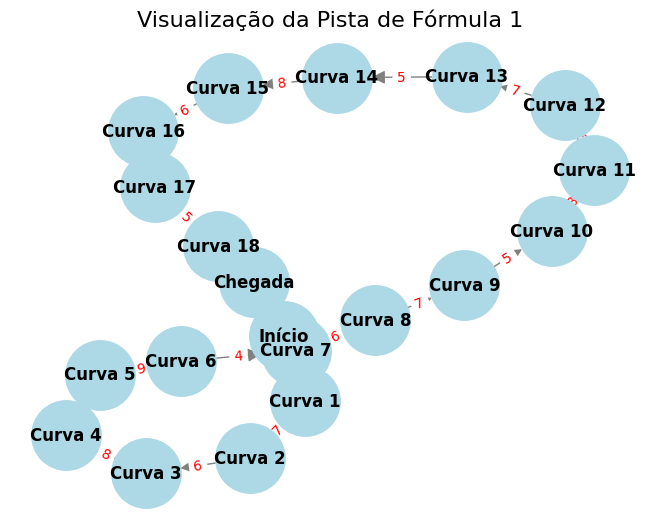

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

class Grafo:
    def __init__(self):
        """
        Inicializa o grafo como um dicionário vazio.
        """
        self.grafo = {}

    def adicionar_aresta(self, u, v, peso):
        """
        Adiciona uma aresta ao grafo.

        Parâmetros:
        u (str): O vértice de origem.
        v (str): O vértice de destino.
        peso (int): Peso da aresta (tempo em segundos).
        """
        if u not in self.grafo:
            self.grafo[u] = []
        self.grafo[u].append((v, peso))
        if v not in self.grafo:
            self.grafo[v] = []

    def dijkstra(self, inicio):
        """
        Implementa o algoritmo de Dijkstra manualmente para encontrar o caminho mais curto a partir de um vértice inicial.

        Parâmetros:
        inicio (str): O vértice inicial para calcular as distâncias.

        Retorna:
        dict: Um dicionário contendo as menores distâncias do vértice inicial para cada vértice no grafo.
        """
        distancias = {vertice: float('infinity') for vertice in self.grafo}
        distancias[inicio] = 0
        visitados = set()

        while len(visitados) < len(self.grafo):
            menor_distancia = float('infinity')
            vertice_min = None
            for vertice in distancias:
                if vertice not in visitados and distancias[vertice] < menor_distancia:
                    menor_distancia = distancias[vertice]
                    vertice_min = vertice

            if vertice_min is None:
                break

            visitados.add(vertice_min)

            for vizinho, peso in self.grafo[vertice_min]:
                if vizinho not in visitados:
                    nova_distancia = distancias[vertice_min] + peso
                    if nova_distancia < distancias[vizinho]:
                        distancias[vizinho] = nova_distancia

        return distancias

# Criando o grafo da pista de Fórmula 1
grafo = Grafo()

# Definindo as curvas da pista com os tempos em segundos
curvas_pista = [
    ('Início', 'Curva 1', 5),
    ('Curva 1', 'Curva 2', 7),
    ('Curva 2', 'Curva 3', 6),
    ('Curva 3', 'Curva 4', 8),
    ('Curva 4', 'Curva 5', 5),
    ('Curva 5', 'Curva 6', 9),
    ('Curva 6', 'Curva 7', 4),
    ('Curva 7', 'Curva 8', 6),
    ('Curva 8', 'Curva 9', 7),
    ('Curva 9', 'Curva 10', 5),
    ('Curva 10', 'Curva 11', 8),
    ('Curva 11', 'Curva 12', 6),
    ('Curva 12', 'Curva 13', 7),
    ('Curva 13', 'Curva 14', 5),
    ('Curva 14', 'Curva 15', 8),
    ('Curva 15', 'Curva 16', 6),
    ('Curva 16', 'Curva 17', 7),
    ('Curva 17', 'Curva 18', 5),
    ('Curva 18', 'Chegada', 10),
    ('Chegada', 'Início', 15)
]

# Adicionando as arestas ao grafo
for u, v, peso in curvas_pista:
    grafo.adicionar_aresta(u, v, peso)

# Calculando as distâncias mais curtas a partir do ponto 'Início'
distancias = grafo.dijkstra_manual('Início')

# Exibindo os resultados
print("Tempos mais curtos para alcançar cada curva a partir do 'Início':")
for curva, tempo in distancias.items():
    print(f"{curva}: {tempo} segundos")

# Criando a visualização do grafo usando NetworkX
G = nx.DiGraph()
for u, v, peso in curvas_pista:
    G.add_edge(u, v, weight=peso)

# Configurando o layout do grafo para uma visualização linear
pos = nx.spring_layout(G, seed=42)  # Usando um layout spring para uma representação mais sequencial
labels = nx.get_edge_attributes(G, 'weight')

# Desenhando o grafo
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray', arrowsize=20, arrowstyle='-|>')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=10)

# Título da visualização
plt.title("Visualização da Pista de Fórmula 1", fontsize=16)
plt.show()